# Double Different Relocation

This notebook will take the phase picks from the associated picks, perform double difference relocation, and plot the earthquake catalog.

by Felix Waldhauser

## 1. Compute differential times from phase file

In [ ]:
%cd /app/hypodd/results_hypodd
%pwd
!ph2dt ph2dt.inp

## 2. Run double-difference relocation

In [ ]:
!hypoDD hypoDD.inp

# 3. Manipulate the new catalog

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Read the relocated catalog**

In [2]:
events_hypodd = pd.read_csv('./hypoDD.reloc',header=None, sep="\s+",names=['ID', 'LAT', 'LON', 'DEPTH', 'X', 'Y', 'Z', 'EX', 'EY', 'EZ', 'YR', 'MO', 'DY', 'HR', 'MI', 'SC', 'MAG', 'NCCP', 'NCCS', 'NCTP', 'NCTS', 'RCC', 'RCT', 'CID'])
events_hypodd

,ID,LAT,LON,DEPTH,X,Y,Z,EX,EY,EZ,...,MI,SC,MAG,NCCP,NCCS,NCTP,NCTS,RCC,RCT,CID
0,10,40.479472,-124.313924,17.746,-7130.8,-7587.8,-504.3,495.2,464.1,446.2,...,19,14.89,0.19,0,0,55,51,-9.0,0.140,1
1,13,40.406616,-124.365373,14.527,-11497.3,-15678.1,-3723.3,690.2,1026.9,762.1,...,29,21.75,0.73,0,0,12,4,-9.0,0.150,1
2,14,40.514408,-124.419613,15.401,-16083.8,-3708.3,-2849.4,192.7,270.9,159.0,...,34,24.66,6.09,0,0,654,711,-9.0,0.211,1
3,15,40.588436,-124.114697,17.217,9745.9,4512.1,-1033.3,140.1,208.6,287.0,...,35,59.17,3.73,0,0,604,798,-9.0,0.168,1
4,16,40.517322,-124.329557,17.127,-8453.4,-3384.8,-1123.4,194.0,236.8,165.0,...,36,14.62,3.13,0,0,156,443,-9.0,0.109,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,1157,40.539779,-123.959904,19.063,22862.3,-891.0,812.6,255.0,327.8,480.5,...,54,8.52,0.57,0,0,446,560,-9.0,0.167,1
1051,1158,40.576978,-124.399479,22.143,-14371.3,3239.7,3892.7,572.0,520.1,569.1,...,55,52.26,0.75,0,0,11,9,-9.0,0.188,1
1052,1159,40.531274,-124.299154,15.873,-5876.8,-1835.4,-2377.1,308.1,240.9,309.0,...,56,37.56,0.74,0,0,232,293,-9.0,0.175,1
1053,1160,40.633927,-123.987695,19.623,20493.8,9563.7,1372.9,192.8,278.0,307.1,...,58,40.20,1.13,0,0,370,412,-9.0,0.179,1


Plot

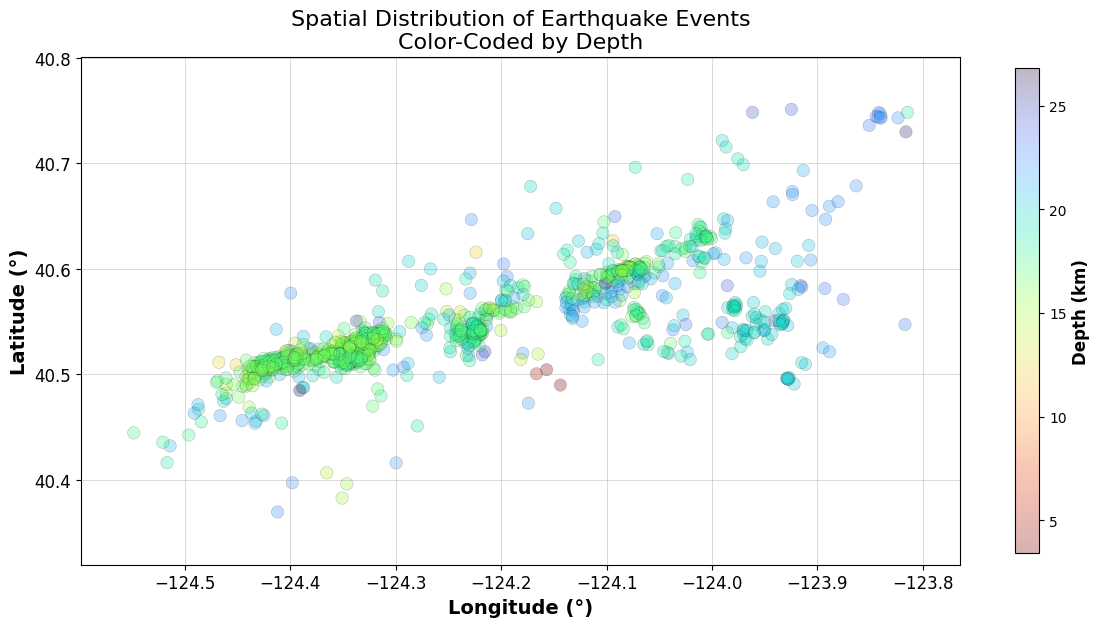

In [23]:
# Create a figure for the plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)

# Create scatter plot with depth-coded colors
scatter = ax.scatter(events_hypodd['LON'], events_hypodd['LAT'], 
                    c=events_hypodd['DEPTH'],
                    cmap='turbo_r',  # Use reversed turbo colormap (red for deep, blue for shallow)
                    s=80,  # marker size for good visibility
                    marker='o',
                    edgecolor='k',
                    linewidth=0.3,
                    alpha=0.3)

# Add colorbar with depth information
cbar = plt.colorbar(scatter, ax=ax, shrink=0.5)  # Adjust shrink to make the colorbar smaller
cbar.set_label('Depth (km)', fontsize=12, fontweight='bold')
cbar.ax.tick_params(labelsize=10)

# Set equal aspect ratio for proper geographical representation
ax.set_aspect('equal')

# Add grid with crisp styling
ax.grid(True, linestyle='-', linewidth=0.5, alpha=0.4, color='gray')

# Add descriptive labels
ax.set_xlabel('Longitude (°)', fontsize=14, fontweight='bold')
ax.set_ylabel('Latitude (°)', fontsize=14, fontweight='bold')
ax.set_title('Spatial Distribution of Earthquake Events\nColor-Coded by Depth', fontsize=16)

# Adjust limits with a small buffer around data points
buffer = 0.05
ax.set_xlim(events_hypodd['LON'].min() - buffer, events_hypodd['LON'].max() + buffer)
ax.set_ylim(events_hypodd['LAT'].min() - buffer, events_hypodd['LAT'].max() + buffer)

# Format tick labels
ax.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()

**Plot cross sections**

Find the cross section along the main axis. Use PCA to find the long axis.

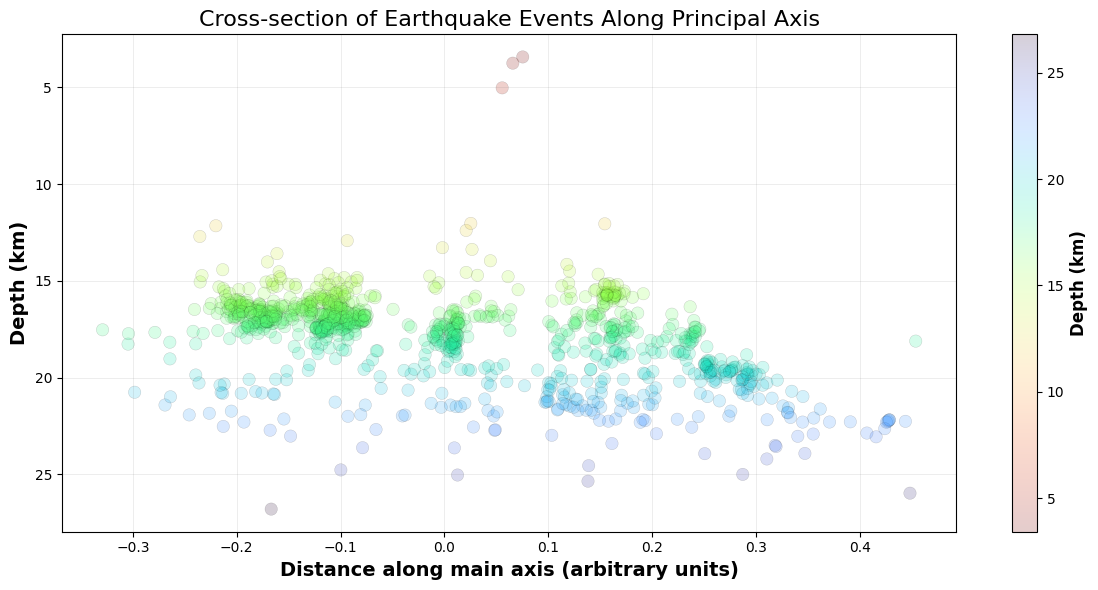

Main axis direction (LON, LAT): [0.97499714 0.2222174 ]
Explained variance ratio: 0.97


In [24]:
from sklearn.decomposition import PCA

# Apply PCA to find the main axis of the earthquake cluster

# Extract coordinates for PCA
coords = events_hypodd[['LON', 'LAT']].values
pca = PCA(n_components=2)
pca.fit(coords)

# Project points onto the principal component
projected_points = pca.transform(coords)
# The first column of projected_points represents distance along the main axis

# Create a new figure for the cross-section plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot depth vs distance along the main axis
sc = ax.scatter(projected_points[:, 0], events_hypodd['DEPTH'], 
           c=events_hypodd['DEPTH'],
           cmap='turbo_r',
           s=80,
           marker='o',
           edgecolor='k',
           linewidth=0.3,
           alpha=0.2)

# Add colorbar
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Depth (km)', fontsize=12, fontweight='bold')

# Set labels and title
ax.set_xlabel('Distance along main axis (arbitrary units)', fontsize=14, fontweight='bold')
ax.set_ylabel('Depth (km)', fontsize=14, fontweight='bold')
ax.set_title('Cross-section of Earthquake Events Along Principal Axis', fontsize=16)

# Add grid
ax.grid(True, linestyle='-', linewidth=0.5, alpha=0.2, color='gray')

# Adjust y-axis to show depth properly (negative values going down)
ax.invert_yaxis()

plt.tight_layout()
plt.show()

# Print direction of main axis for reference
main_axis_vector = pca.components_[0]
print(f"Main axis direction (LON, LAT): {main_axis_vector}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_[0]:.2f}")

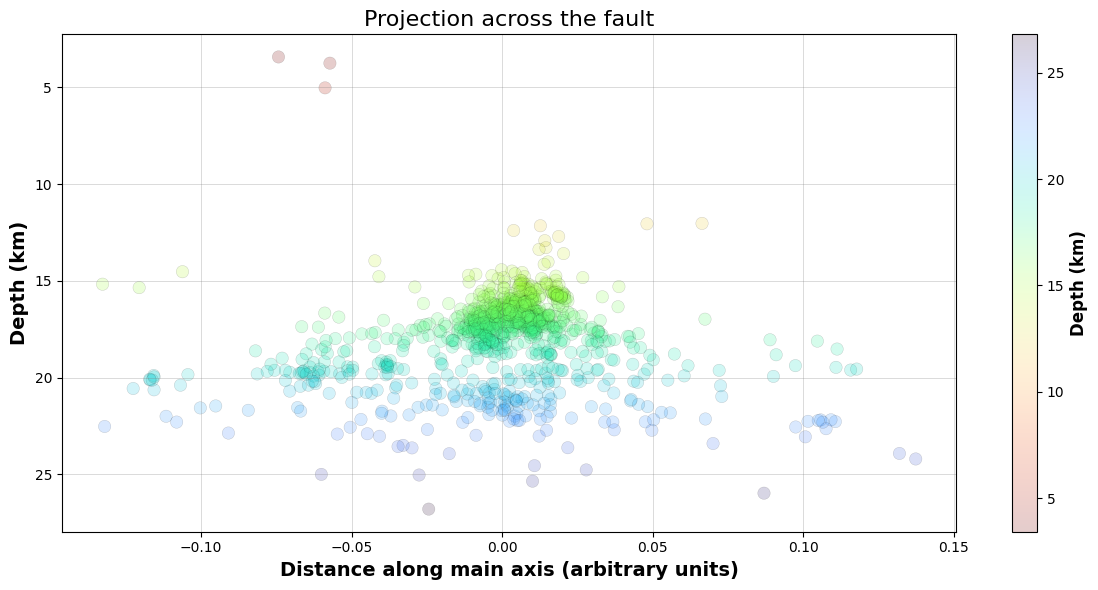

Main axis direction (LON, LAT): [0.97499714 0.2222174 ]
Explained variance ratio: 0.97


In [25]:
from sklearn.decomposition import PCA

# Apply PCA to find the main axis of the earthquake cluster

# Extract coordinates for PCA
coords = events_hypodd[['LON', 'LAT']].values
pca = PCA(n_components=2)
pca.fit(coords)

# Project points onto the principal component
projected_points = pca.transform(coords)
# The first column of projected_points represents distance along the main axis

# Create a new figure for the cross-section plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot depth vs distance along the main axis
sc = ax.scatter(projected_points[:, 1], events_hypodd['DEPTH'], 
           c=events_hypodd['DEPTH'],
           cmap='turbo_r',
           s=80,
           marker='o',
           edgecolor='k',
           linewidth=0.3,
           alpha=0.2)

# Add colorbar
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Depth (km)', fontsize=12, fontweight='bold')

# Set labels and title
ax.set_xlabel('Distance along main axis (arbitrary units)', fontsize=14, fontweight='bold')
ax.set_ylabel('Depth (km)', fontsize=14, fontweight='bold')
ax.set_title('Projection across the fault', fontsize=16)

# Add grid
ax.grid(True, linestyle='-', linewidth=0.5, alpha=0.4, color='gray')

# Adjust y-axis to show depth properly (negative values going down)
ax.invert_yaxis()

plt.tight_layout()
plt.show()

# Print direction of main axis for reference
main_axis_vector = pca.components_[0]
print(f"Main axis direction (LON, LAT): {main_axis_vector}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_[0]:.2f}")

Now we are going to compare before and after relocation.


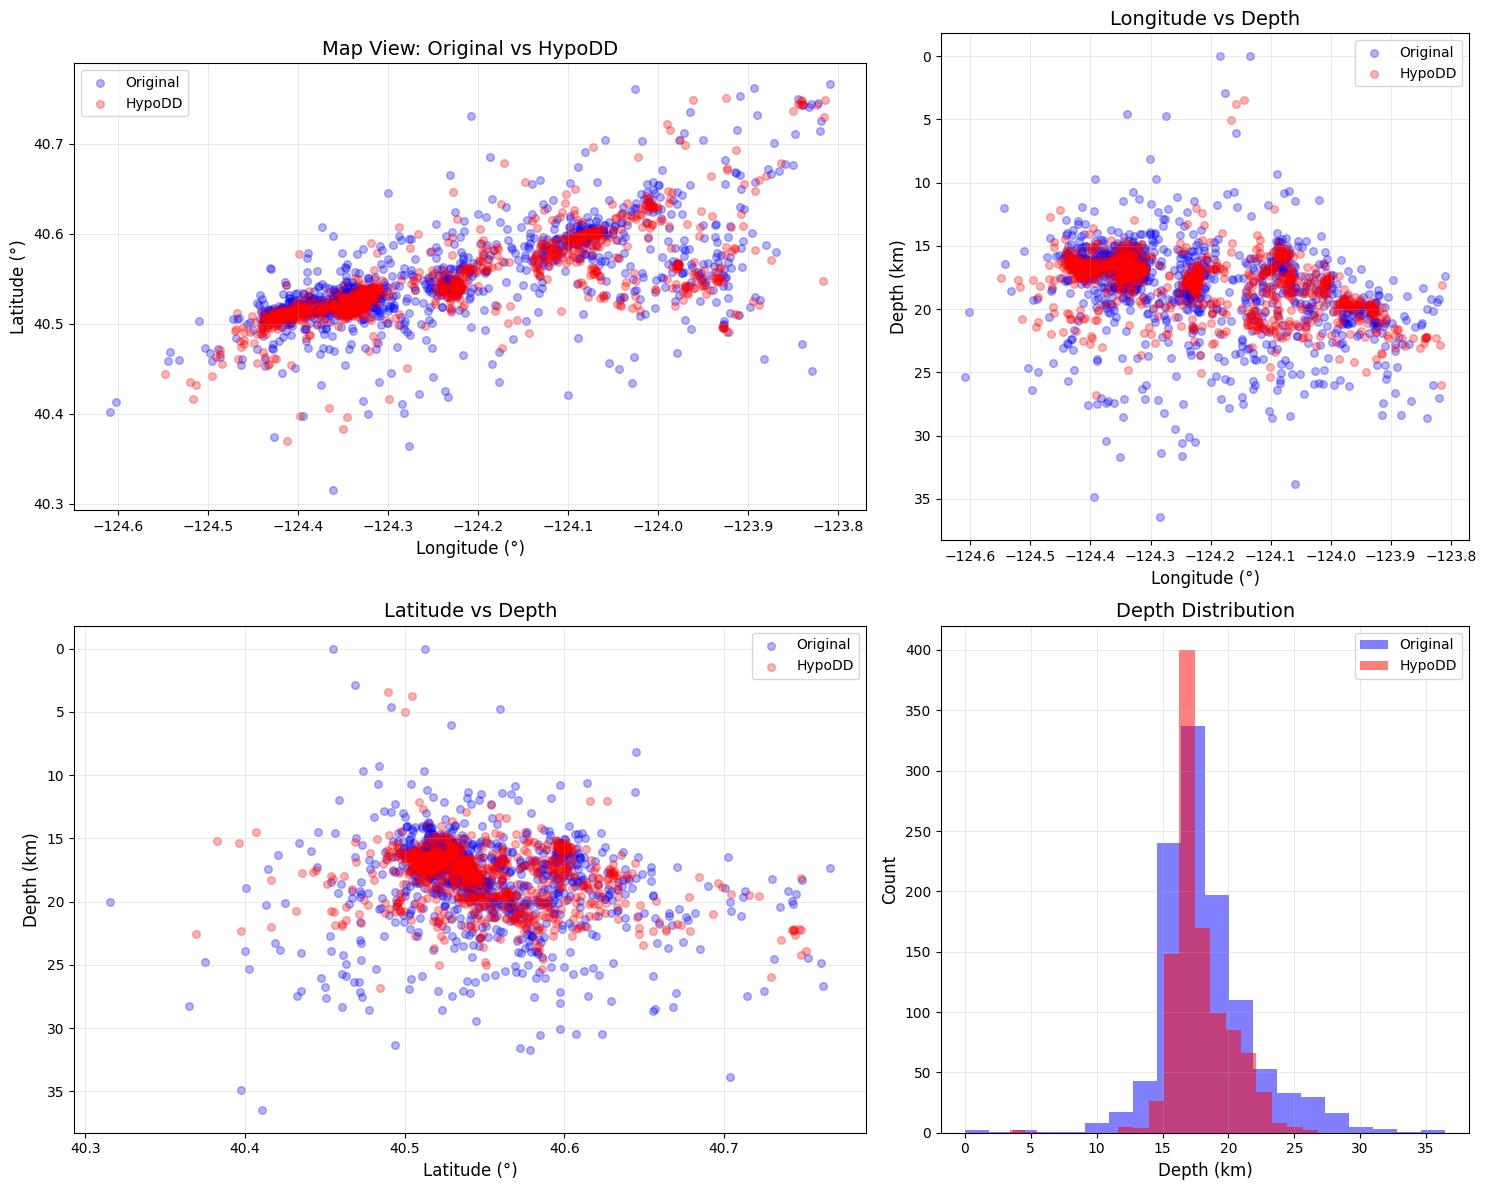

Mean location changes:
  Latitude: -0.001978 degrees
  Longitude: -0.001164 degrees
  Depth: -0.39 km
Maximum location changes:
  Latitude: 0.300660 degrees
  Longitude: 0.726135 degrees
  Depth: 19.54 km


In [26]:
# Read the original catalog for comparison
events_original = pd.read_csv('./HypoDD.loc', header=None, sep="\s+", 
                            names=['ID', 'LAT', 'LON', 'DEPTH', 'X', 'Y', 'Z', 'EX', 'EY', 'EZ', 
                                  'YR', 'MO', 'DY', 'HR', 'MI', 'SC', 'MAG', 'NCCP', 'NCCS', 'NCTP', 
                                  'NCTS', 'RCC', 'RCT', 'CID'])

# Create a figure with 2x2 grid for comparing before and after
fig = plt.figure(figsize=(15, 12))
gs = fig.add_gridspec(2, 2, width_ratios=[1.5, 1])

# Map view comparison (top-left)
ax1 = fig.add_subplot(gs[0, 0])
ax1.scatter(events_original['LON'], events_original['LAT'], c='blue', s=30, alpha=0.3, label='Original')
ax1.scatter(events_hypodd['LON'], events_hypodd['LAT'], c='red', s=30, alpha=0.3, label='HypoDD')
ax1.set_xlabel('Longitude (°)', fontsize=12)
ax1.set_ylabel('Latitude (°)', fontsize=12)
ax1.set_title('Map View: Original vs HypoDD', fontsize=14)
ax1.legend()
ax1.grid(True, linestyle='-', linewidth=0.5, alpha=0.4)
ax1.set_aspect('equal')

# Depth cross-section along longitude (top-right)
ax2 = fig.add_subplot(gs[0, 1])
ax2.scatter(events_original['LON'], events_original['DEPTH'], c='blue', s=30, alpha=0.3, label='Original')
ax2.scatter(events_hypodd['LON'], events_hypodd['DEPTH'], c='red', s=30, alpha=0.3, label='HypoDD')
ax2.set_xlabel('Longitude (°)', fontsize=12)
ax2.set_ylabel('Depth (km)', fontsize=12)
ax2.set_title('Longitude vs Depth', fontsize=14)
ax2.legend()
ax2.grid(True, linestyle='-', linewidth=0.5, alpha=0.4)
ax2.invert_yaxis()  # Depths increase downward

# Depth cross-section along latitude (bottom-left)
ax3 = fig.add_subplot(gs[1, 0])
ax3.scatter(events_original['LAT'], events_original['DEPTH'], c='blue', s=30, alpha=0.3, label='Original')
ax3.scatter(events_hypodd['LAT'], events_hypodd['DEPTH'], c='red', s=30, alpha=0.3, label='HypoDD')
ax3.set_xlabel('Latitude (°)', fontsize=12)
ax3.set_ylabel('Depth (km)', fontsize=12)
ax3.set_title('Latitude vs Depth', fontsize=14)
ax3.legend()
ax3.grid(True, linestyle='-', linewidth=0.5, alpha=0.4)
ax3.invert_yaxis()  # Depths increase downward

# Depth histogram comparison (bottom-right)
ax4 = fig.add_subplot(gs[1, 1])
ax4.hist(events_original['DEPTH'], bins=20, alpha=0.5, color='blue', label='Original')
ax4.hist(events_hypodd['DEPTH'], bins=20, alpha=0.5, color='red', label='HypoDD')
ax4.set_xlabel('Depth (km)', fontsize=12)
ax4.set_ylabel('Count', fontsize=12)
ax4.set_title('Depth Distribution', fontsize=14)
ax4.legend()
ax4.grid(True, linestyle='-', linewidth=0.5, alpha=0.4)

plt.tight_layout()
plt.show()

# Calculate and print some statistics about the differences
print(f"Mean location changes:")
print(f"  Latitude: {(events_hypodd['LAT'] - events_original['LAT']).mean():.6f} degrees")
print(f"  Longitude: {(events_hypodd['LON'] - events_original['LON']).mean():.6f} degrees")
print(f"  Depth: {(events_hypodd['DEPTH'] - events_original['DEPTH']).mean():.2f} km")
print(f"Maximum location changes:")
print(f"  Latitude: {(events_hypodd['LAT'] - events_original['LAT']).abs().max():.6f} degrees")
print(f"  Longitude: {(events_hypodd['LON'] - events_original['LON']).abs().max():.6f} degrees")
print(f"  Depth: {(events_hypodd['DEPTH'] - events_original['DEPTH']).abs().max():.2f} km")